k-Means Clustering

In [1]:
#K-Means Clustering

#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
#allow charts to appear in the notebook
%matplotlib inline

In [2]:
#importing the dataset
dataset = pd.read_csv('K_means_Algo.csv')
dataset
# df = pd.read_csv('kmeans.csv')
# df.head()

,mpg,cylinders,cubicinches,hp,time-to-60,year,brand
0,14,8,350,545,12,1987,Toyota
1,31,4,89,454,11,1989,Honda
2,17,8,302,84,14,1985,Toyota
3,15,9,98,454,13,1875,Honda
4,30,4,350,122,15,1876,Toyota
5,23,8,351,251,16,1984,Honda
6,13,8,440,121,17,1981,Nissan
7,14,8,183,151,18,1983,Toyota
8,25,5,89,89,19,1988,Nissan
9,37,4,108,212,15,1985,Honda


In [3]:
X = dataset.iloc[:, :-1].values
print(X)

[[  14    8  350  545   12 1987]
 [  31    4   89  454   11 1989]
 [  17    8  302   84   14 1985]
 [  15    9   98  454   13 1875]
 [  30    4  350  122   15 1876]
 [  23    8  351  251   16 1984]
 [  13    8  440  121   17 1981]
 [  14    8  183  151   18 1983]
 [  25    5   89   89   19 1988]
 [  37    4  108  212   15 1985]
 [  34    4   97  202   20 1986]
 [  35    4  302   46   21 1985]
 [  16    8  350  212   14 1982]
 [  11    8  225   78   16 1987]
 [  19    6  350   51   11 1984]
 [  16    8   85  365   10 1989]
 [  31    4  350  151    9 1975]]


In [4]:
print(dataset.columns)

Index(['mpg ', 'cylinders', 'cubicinches', 'hp', 'time-to-60', 'year',
       'brand'],
      dtype='object')


In [5]:
X = dataset[dataset.columns[:-1]]
X = X._convert(numeric=True)
#X = X.convert_objects(convert_numeric=True)
X.head()

,mpg,cylinders,cubicinches,hp,time-to-60,year
0,14,8,350,545,12,1987
1,31,4,89,454,11,1989
2,17,8,302,84,14,1985
3,15,9,98,454,13,1875
4,30,4,350,122,15,1876


In [6]:
# eliminating null values
for i in X.columns :
  X[i] = X[i].fillna(int(X[i].mean()))

for i in X.columns :
  print(X[i].isnull().sum()) 


# converting 'Field_2' from float to int

0
0
0
0
0
0


In [7]:
# #using the elbow method to find the optimal number of clusters

# # from sklearn.cluster import KMeans
# wcss = []

# # X = dataset[dataset.columns[:-1]]
# for i in range(0,11):
#   kmeans = KMeans(n_clusters=i,init ='k-means++',max_iter=300,n_init=10,random_state=0)
#   kmeans.fit(X)
#   wcss.append(kmeans.inertia_)

# plt.plot(range(0,11), wcss)
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('wcss')
# plt.show()



# # these code is not working find solution, ohkieeee

In [8]:
dataset = pd.read_csv('K_means_Algo.csv')
dataset.head()

,mpg,cylinders,cubicinches,hp,time-to-60,year,brand
0,14,8,350,545,12,1987,Toyota
1,31,4,89,454,11,1989,Honda
2,17,8,302,84,14,1985,Toyota
3,15,9,98,454,13,1875,Honda
4,30,4,350,122,15,1876,Toyota


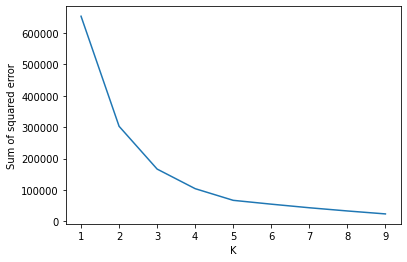

In [9]:
sse = []
k_rng = range(1,10)
for k in k_rng :
  km =KMeans(n_clusters = k)
  km.fit(dataset[['cylinders','cubicinches','hp','time-to-60','year']])
  sse.append(km.inertia_)


plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [16]:
X = dataset[dataset.columns[1:-1]]
kmeans = KMeans(n_clusters =3 )
y_kmeans = kmeans.fit_predict(X)
y_kmeans
# # X = X.values(columns=None)
# print(y_kmeans)

array([1, 1, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 1, 0], dtype=int32)

In [17]:
dataset['cluster'] = y_kmeans
dataset.head()

,mpg,cylinders,cubicinches,hp,time-to-60,year,brand,cluster
0,14,8,350,545,12,1987,Toyota,1
1,31,4,89,454,11,1989,Honda,1
2,17,8,302,84,14,1985,Toyota,0
3,15,9,98,454,13,1875,Honda,1
4,30,4,350,122,15,1876,Toyota,0


In [18]:
cluster1 = dataset[dataset.cluster == 0]
cluster2 = dataset[dataset.cluster == 1]
cluster3 = dataset[dataset.cluster == 2]

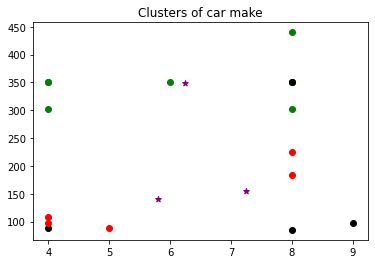

In [32]:
plt.scatter(cluster1.cylinders,cluster1['cubicinches'], color = 'green',label = 'Toyota')
plt.scatter(cluster2.cylinders,cluster2['cubicinches'], color = 'black', label = 'Nissan')
plt.scatter(cluster3.cylinders,cluster3['cubicinches'], color = 'red', label = 'Honda')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = 'purple', marker = '*', label = 'centroid')
plt.title('Clusters of car make')
# plt.legend()
plt.show()

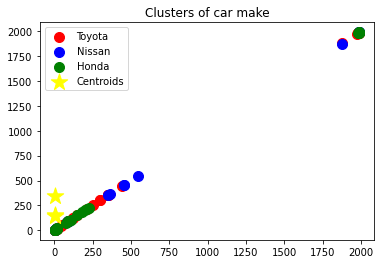

In [38]:
plt.scatter(X[y_kmeans == 0],X[y_kmeans == 0], s = 100, c = 'red', label = 'Toyota')
plt.scatter(X[y_kmeans == 1],X[y_kmeans == 1], s = 100, c = 'blue', label ='Nissan')
plt.scatter(X[y_kmeans == 2],X[y_kmeans == 2], s = 100, c = 'green', label = 'Honda')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 300,marker = '*', c = 'yellow' , label='Centroids')
plt.title('Clusters of car make')
plt.legend()
plt.show()